<h1>WORDCLOUD</h1>

In [3]:
!pip install wordcloud

In [6]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk.tokenize import word_tokenize

# Download stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Read the text file: all pdf data combined
file_path = 'libraryAsText.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Clean the text
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

cleaned_text = clean_text(text)




[nltk_data] Downloading package stopwords to C:\Users\Rune
[nltk_data]     Heidtmann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rune
[nltk_data]     Heidtmann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Tokenize  text
tokens = word_tokenize(cleaned_text)
tokens[1]

'on'

In [19]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

# Extra tokens needed to be removed.
stop_words = stop_words + ['et','al','mar','crossref', 'pubmed','int', 'j','p','p','c', 'h','b','j','e', 'ects','ect','f']

In [20]:
filtered_tokens = [word for word in tokens if word not in stop_words]

In [31]:
# Generate bigrams
bigrams_list = list(bigrams(filtered_tokens))

# Find the 50 most common bigrams
bigram_counts = Counter(bigrams_list)
most_common_bigrams = bigram_counts.most_common(50)
print(most_common_bigrams)


[(('molecular', 'weight'), 4013), (('sulfated', 'polysaccharides'), 3083), (('cancer', 'cells'), 2969), (('brown', 'algae'), 2588), (('oxidative', 'stress'), 2429), (('cell', 'viability'), 1981), (('brown', 'seaweed'), 1817), (('fucus', 'vesiculosus'), 1815), (('control', 'group'), 1790), (('biol', 'macromol'), 1629), (('bioresour', 'technol'), 1615), (('carbohydr', 'polym'), 1545), (('cells', 'treated'), 1540), (('effect', 'fucoidan'), 1497), (('sulfated', 'polysaccharide'), 1451), (('effects', 'fucoidan'), 1435), (('cell', 'lines'), 1422), (('algal', 'biomass'), 1412), (('fatty', 'acids'), 1401), (('cell', 'cycle'), 1343), (('antioxidant', 'activity'), 1300), (('low', 'molecular'), 1274), (('compared', 'control'), 1254), (('mol', 'sci'), 1244), (('present', 'study'), 1238), (('appl', 'phycol'), 1238), (('cell', 'death'), 1238), (('cancer', 'cell'), 1227), (('biodiesel', 'production'), 1218), (('brown', 'seaweeds'), 1212), (('cell', 'line'), 1182), (('weight', 'fucoidan'), 1178), (('b

In [24]:
import numpy as np

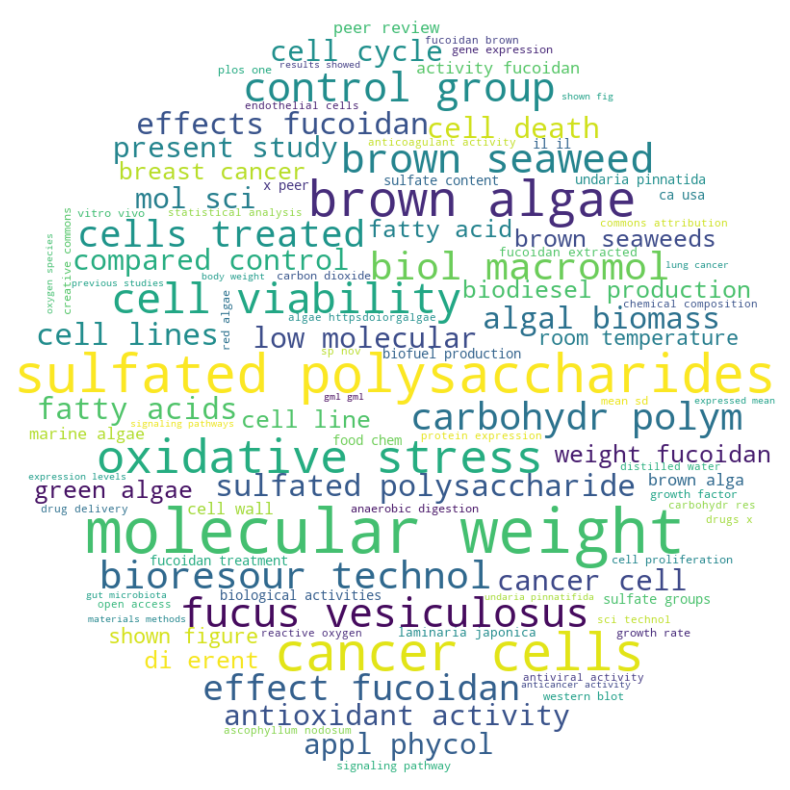

In [32]:
# data for the word cloud
bigram_dict = {' '.join(bigram): count for bigram, count in most_common_bigrams}

# I want to make a circular wordcloud. For this create a circular mask.
x, y = np.ogrid[:800, :800]
mask = (x - 400) ** 2 + (y - 400) ** 2 > 400 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask,  contour_width=0).generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
output_file_path = 'wordcloud_circle.png'
wordcloud.to_file(output_file_path)